## 종목별 수익률 비교 준비

### 라이브러리
- pandas
- FinanaceDataReader

In [1]:
import pandas as pd

In [2]:
!pip install -U finance-datareader

In [3]:
import FinanceDataReader as fdr

### 상장종목 목록

In [4]:
stock_dict = {
    '삼성전자': '005930',
    'SK하이닉스': '000660',
    '현대차': '005380',
    '셀트리온': '068270',
    'LG화학': '051910',
    'POSCO': '005490',
    '삼성물산': '028260',
    'NAVER': '035420'}
stock_dict

{'삼성전자': '005930',
 'SK하이닉스': '000660',
 '현대차': '005380',
 '셀트리온': '068270',
 'LG화학': '051910',
 'POSCO': '005490',
 '삼성물산': '028260',
 'NAVER': '035420'}

In [5]:
type(stock_dict)

dict

In [6]:
stock_dict.keys()

dict_keys(['삼성전자', 'SK하이닉스', '현대차', '셀트리온', 'LG화학', 'POSCO', '삼성물산', 'NAVER'])

In [7]:
stock_dict.values()

dict_values(['005930', '000660', '005380', '068270', '051910', '005490', '028260', '035420'])

### 각 항목의 종가 수집
- stock_dict의 종목코드를 list에 입력
- list를 병합해서 데이터프레임으로

In [8]:
item_list = []
for item_code in stock_dict.values() : 
    print(item_code)
    close = fdr.DataReader(item_code, "2020", "2021")["Close"]
    item_list.append(close)

005930
000660
005380
068270
051910
005490
028260
035420


In [9]:
item_list

[Date
 2020-01-02    55200
 2020-01-03    55500
 2020-01-06    55500
 2020-01-07    55800
 2020-01-08    56800
               ...  
 2020-12-23    73900
 2020-12-24    77800
 2020-12-28    78700
 2020-12-29    78300
 2020-12-30    81000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02     94700
 2020-01-03     94500
 2020-01-06     94300
 2020-01-07     94000
 2020-01-08     97400
                ...  
 2020-12-23    116000
 2020-12-24    118000
 2020-12-28    115500
 2020-12-29    116000
 2020-12-30    118500
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    118000
 2020-01-03    116000
 2020-01-06    116000
 2020-01-07    115500
 2020-01-08    112000
                ...  
 2020-12-23    185000
 2020-12-24    187000
 2020-12-28    189500
 2020-12-29    190500
 2020-12-30    192000
 Name: Close, Length: 248, dtype: int64,
 Date
 2020-01-02    176761
 2020-01-03    174306
 2020-01-06    169887
 2020-01-07    174797
 2020-01-08    169887
                ...  
 2020-

In [10]:
len(item_list)

8

In [11]:
# 리스트 병합(axis=0 : 행으로, axis=1 : 열로)
df = pd.concat(item_list, axis=1)
df

,Close,Close,Close,Close,Close,Close,Close,Close
Date,,,,,,,,
2020-01-02,55200,94700,118000,176761,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174306,311000,237000,107500,181500
2020-01-06,55500,94300,116000,169887,307000,231000,106000,180500
2020-01-07,55800,94000,115500,174797,311000,232000,108000,187000
2020-01-08,56800,97400,112000,169887,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2020-12-23,73900,116000,185000,348613,806000,267500,137000,284000
2020-12-24,77800,118000,187000,341248,818000,271000,139000,282000
2020-12-28,78700,115500,189500,327500,814000,273500,140000,281000


In [12]:
df.columns = stock_dict.keys()
df

,삼성전자,SK하이닉스,현대차,셀트리온,LG화학,POSCO,삼성물산,NAVER
Date,,,,,,,,
2020-01-02,55200,94700,118000,176761,314000,236000,107500,182500
2020-01-03,55500,94500,116000,174306,311000,237000,107500,181500
2020-01-06,55500,94300,116000,169887,307000,231000,106000,180500
2020-01-07,55800,94000,115500,174797,311000,232000,108000,187000
2020-01-08,56800,97400,112000,169887,302000,228000,105000,183000
...,...,...,...,...,...,...,...,...
2020-12-23,73900,116000,185000,348613,806000,267500,137000,284000
2020-12-24,77800,118000,187000,341248,818000,271000,139000,282000
2020-12-28,78700,115500,189500,327500,814000,273500,140000,281000


## 시각화

### 시각화 준비

In [13]:
# 라이브러리 불러오기
import pandas as pd
import seaborn as sns
import numpy as np

In [14]:
import platform
system_name = platform.system()
system_name

'Windows'

In [15]:
def get_font_family() : 
    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows" :
        font_family = "Malgun Gothic"
    else : 
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [16]:
# 시스템 폰트를 불러와서 font_family에 할당
import matplotlib.pyplot as plt
font_family = get_font_family()

# 폰트 설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프 스타일 ggplot으로 설정
plt.style.use("ggplot")

# retina display
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

<AxesSubplot:title={'center':'한글 제목'}>

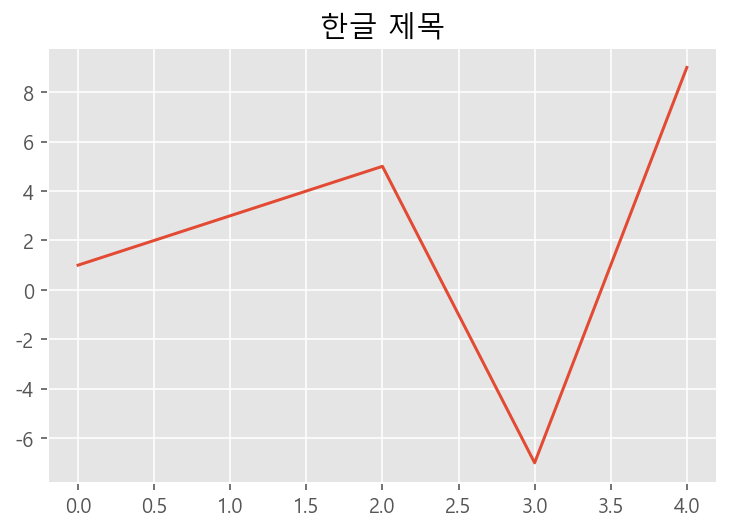

In [17]:
pd.Series([1,3,5,-7,9]).plot(title="한글 제목")

### 시각화

<AxesSubplot:xlabel='Date'>

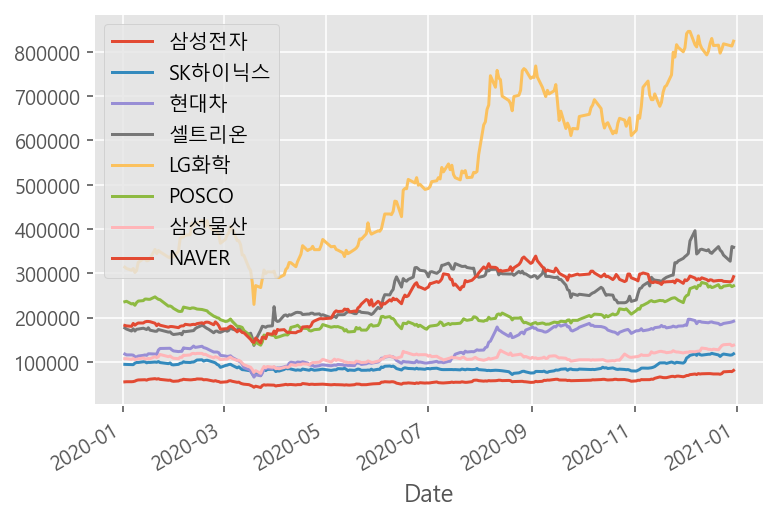

In [18]:
df.plot()

<AxesSubplot:xlabel='Date'>

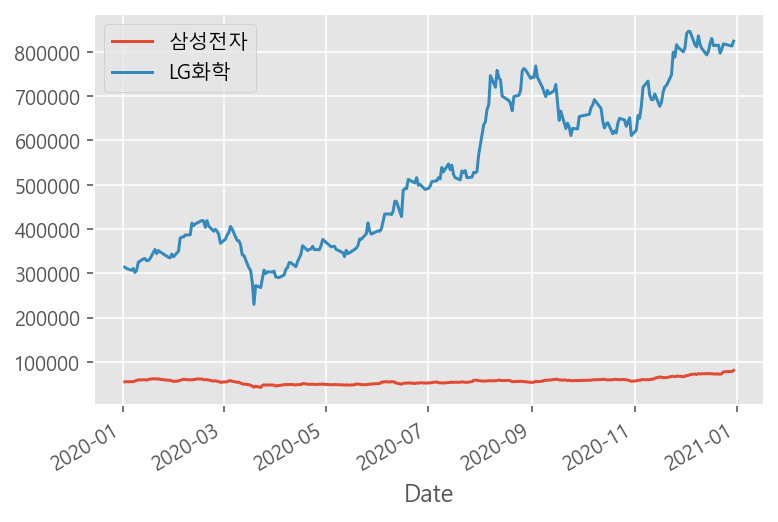

In [19]:
df[["삼성전자", "LG화학"]].plot()

<AxesSubplot:xlabel='Date'>

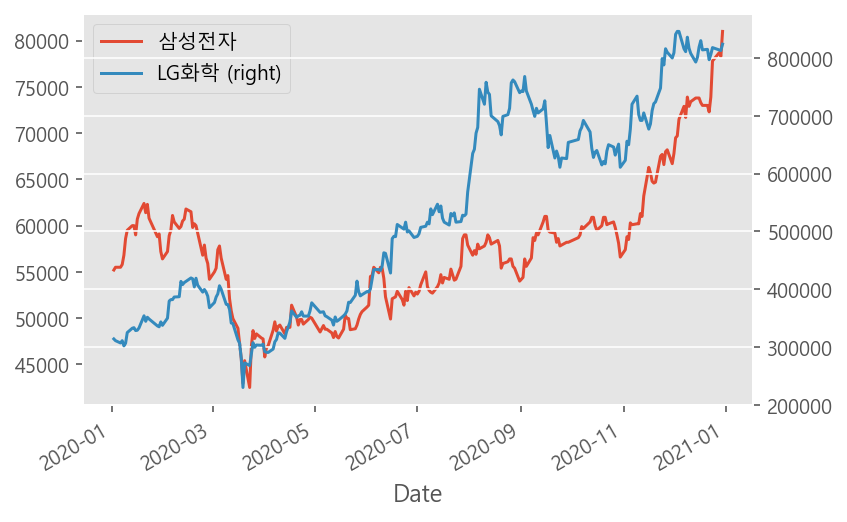

In [20]:
# 스케일 맞춰주기
df[["삼성전자", "LG화학"]].plot(secondary_y="LG화학")